In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 
import math

In [ ]:
rec_start_times = [1657295717000, 1657521140000, 1657530461000, 1657536238000, 1657644994000]
rec_end_times  =  [1657296317000, 1657521740000, 1657531061000, 1657536840000, 1657645595000]

nrecs = len(rec_start_times)
nrounds = 10
trial_len = 30000 
sample_interval = 20

recs= []

for i in range(nrecs):
  df = pd.read_csv('./'+str(rec_start_times[i])+'.'+str(rec_end_times[i])+'.csv')
  df = df.drop_duplicates(subset=['timestamp'])

  # create resampled dataframe rdf
  df['datetime'] = pd.to_datetime(df.timestamp, unit='ms')
  df.set_index('datetime', inplace=True)
  # display(df)

  rdf = pd.concat([df, df.asfreq('1ms')]).sort_index()
  rdf = rdf[~rdf.index.duplicated(keep='first')]
  rdf.interpolate(method='linear', axis=0, inplace=True)

  rdf.drop(rdf[(rdf.timestamp < rec_start_times[i]-10000) | (rdf.timestamp > rec_end_times[i])].index, inplace=True)
  rdf.drop(rdf[rdf.timestamp%sample_interval != 0].index, inplace=True)
  rdf.timestamp -= rec_start_times[i]
  rdf.hbo *= 10**13
  rdf.hbr *= 10**13
  rdf.hbt *= 10**13

  display(rdf)
  recs.append(rdf)


,timestamp,index_firmware,hbo,hbr,hbt,740nm10mm,940nm10mm,850nm10mm,740nm27mm,940nm27mm,850nm27mm
datetime,,,,,,,,,,,
2022-07-08 15:55:07.000,-10000.0,5.573347e+05,5.450334,5.450334,-3.509298,351138.100000,840574.100000,1.663608e+06,274347.733333,385279.166667,440998.333333
2022-07-08 15:55:07.020,-9980.0,5.573613e+05,5.474667,5.474667,-3.476875,351253.500000,841227.066667,1.665201e+06,275025.733333,385659.800000,442545.766667
2022-07-08 15:55:07.040,-9960.0,5.573880e+05,5.548810,5.548810,-3.408620,351623.500000,842468.400000,1.668406e+06,275260.400000,385735.800000,446261.100000
2022-07-08 15:55:07.060,-9940.0,5.574138e+05,5.627191,5.627191,-3.330844,351882.125000,843928.656250,1.671986e+06,275847.937500,385916.781250,450416.250000
2022-07-08 15:55:07.080,-9920.0,5.574388e+05,5.709038,5.709038,-3.245280,352049.625000,845568.031250,1.675873e+06,276724.187500,386183.656250,454931.250000
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-08 16:05:16.920,599920.0,1.201768e+06,6.215714,6.215714,-2.986137,354693.200000,859009.200000,1.731779e+06,273339.400000,389980.600000,471881.600000
2022-07-08 16:05:16.940,599940.0,1.201788e+06,6.233823,6.233823,-2.968017,354806.200000,859207.200000,1.732668e+06,273482.900000,390582.100000,472898.100000
2022-07-08 16:05:16.960,599960.0,1.201808e+06,6.251987,6.251987,-2.948594,354888.243902,859469.414634,1.733488e+06,273701.682927,390921.536585,473964.975610


,timestamp,index_firmware,hbo,hbr,hbt,740nm10mm,940nm10mm,850nm10mm,740nm27mm,940nm27mm,850nm27mm
datetime,,,,,,,,,,,
2022-07-11 06:32:10.000,-10000.0,115795.000000,6.812074,6.812074,-2.372139,352193.000000,890290.500000,1.769410e+06,278779.750000,413831.125000,538106.250000
2022-07-11 06:32:10.020,-9980.0,115815.000000,6.893081,6.893081,-2.294414,352597.125000,892554.000000,1.775122e+06,279234.000000,415767.625000,543198.875000
2022-07-11 06:32:10.040,-9960.0,115835.000000,6.978349,6.978349,-2.213233,353030.625000,894898.000000,1.781008e+06,279674.000000,418247.125000,548553.375000
2022-07-11 06:32:10.060,-9940.0,115852.000000,6.973504,6.973504,-2.224906,353014.800000,895220.600000,1.781892e+06,279221.200000,418256.200000,547958.500000
2022-07-11 06:32:10.080,-9920.0,115868.000000,6.938622,6.938622,-2.267529,352849.200000,894869.400000,1.781108e+06,278470.800000,417441.800000,545380.500000
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11 06:42:19.920,599920.0,760184.000000,6.049143,6.049143,-3.058917,340630.800000,811979.600000,1.607237e+06,264136.600000,382218.400000,473230.600000
2022-07-11 06:42:19.940,599940.0,760222.857143,6.108041,6.108041,-3.003952,340919.714286,814277.714286,1.612835e+06,264358.142857,383440.857143,476407.857143
2022-07-11 06:42:19.960,599960.0,760251.000000,6.140842,6.140842,-2.970014,341103.650000,815798.500000,1.616545e+06,264674.325000,384153.675000,478306.500000


,timestamp,index_firmware,hbo,hbr,hbt,740nm10mm,940nm10mm,850nm10mm,740nm27mm,940nm27mm,850nm27mm
datetime,,,,,,,,,,,
2022-07-11 09:07:31.000,-10000.0,1.042486e+06,8.587980,8.587980,-4.125187,405770.896552,991068.310345,2.153558e+06,169349.034483,230573.413793,389093.448276
2022-07-11 09:07:31.020,-9980.0,1.042513e+06,8.602567,8.602567,-4.113200,405765.379310,990784.862069,2.153926e+06,169324.206897,230855.482759,389690.689655
2022-07-11 09:07:31.040,-9960.0,1.042541e+06,8.608464,8.608464,-4.108264,405653.827586,991060.034483,2.154264e+06,169317.482759,231068.241379,389935.172414
2022-07-11 09:07:31.060,-9940.0,1.042568e+06,8.612316,8.612316,-4.106289,405636.161290,991322.419355,2.154440e+06,169266.870968,231159.774194,390057.870968
2022-07-11 09:07:31.080,-9920.0,1.042594e+06,8.618159,8.618159,-4.105740,405920.032258,991120.483871,2.154259e+06,169099.774194,231022.354839,390170.774194
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11 09:17:40.920,599920.0,1.686911e+06,8.465802,8.465802,-4.242551,404342.700000,976149.300000,2.120827e+06,169019.025000,230166.125000,387064.600000
2022-07-11 09:17:40.940,599940.0,1.686931e+06,8.443708,8.443708,-4.264604,404217.325000,975791.125000,2.119848e+06,168912.925000,229822.600000,386055.100000
2022-07-11 09:17:40.960,599960.0,1.686951e+06,8.406113,8.406113,-4.301477,404108.825000,974938.625000,2.117728e+06,168756.425000,229134.600000,384357.100000


,timestamp,index_firmware,hbo,hbr,hbt,740nm10mm,940nm10mm,850nm10mm,740nm27mm,940nm27mm,850nm27mm
datetime,,,,,,,,,,,
2022-07-11 10:43:48.000,-10000.0,150165.000000,4.916039,4.916039,-5.503452,361619.875000,875162.125000,1.765922e+06,235121.000000,344217.375000,342278.625000
2022-07-11 10:43:48.020,-9980.0,150185.000000,4.934274,4.934274,-5.477592,361715.375000,875390.625000,1.766592e+06,235637.000000,344758.875000,343221.125000
2022-07-11 10:43:48.040,-9960.0,150205.000000,4.955446,4.955446,-5.453822,361776.000000,875653.125000,1.767315e+06,235914.375000,345095.000000,344152.375000
2022-07-11 10:43:48.060,-9940.0,150225.000000,4.985427,4.985427,-5.436317,361732.000000,876017.625000,1.768196e+06,235475.875000,344815.000000,345049.875000
2022-07-11 10:43:48.080,-9920.0,150244.878049,4.995533,4.995533,-5.433885,361749.731707,876401.487805,1.769121e+06,235149.560976,344566.585366,345262.024390
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11 10:53:59.920,601920.0,796671.000000,6.451226,6.451226,-3.783674,366331.750000,890773.550000,1.810223e+06,253746.425000,365520.050000,414152.450000
2022-07-11 10:53:59.940,601940.0,796690.731707,6.466164,6.466164,-3.769852,366432.682927,890907.414634,1.810947e+06,253793.780488,365758.585366,414851.902439
2022-07-11 10:53:59.960,601960.0,796710.243902,6.480164,6.480164,-3.757083,366497.560976,890871.804878,1.811703e+06,253827.926829,366314.195122,415502.634146


,timestamp,index_firmware,hbo,hbr,hbt,740nm10mm,940nm10mm,850nm10mm,740nm27mm,940nm27mm,850nm27mm
datetime,,,,,,,,,,,
2022-07-12 16:56:24.000,-10000.0,979113.000000,3.377510,3.377510,-7.177562,369334.625000,856530.975000,1.752599e+06,262355.525000,355451.675000,380129.175000
2022-07-12 16:56:24.020,-9980.0,979133.333333,3.391308,3.391308,-7.164064,369495.666667,857264.666667,1.754654e+06,262407.666667,355100.666667,380671.000000
2022-07-12 16:56:24.040,-9960.0,979153.846154,3.367876,3.367876,-7.186508,369585.923077,857654.923077,1.755966e+06,262251.769231,354921.692308,379577.153846
2022-07-12 16:56:24.060,-9940.0,979174.358974,3.137386,3.137386,-7.410752,369174.333333,855319.128205,1.749783e+06,260840.538462,351946.307692,369664.743590
2022-07-12 16:56:24.080,-9920.0,979194.871795,2.818158,2.818158,-7.721482,368547.666667,851815.025641,1.740389e+06,258891.307692,347772.461538,355972.948718
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-12 17:06:34.920,600920.0,34673.000000,5.680939,5.680939,-4.153360,362501.250000,838200.900000,1.704690e+06,241649.850000,338555.675000,324202.150000
2022-07-12 17:06:34.940,600940.0,34693.000000,5.653771,5.653771,-4.176063,362280.000000,837278.675000,1.702231e+06,241696.000000,338471.575000,323261.450000
2022-07-12 17:06:34.960,600960.0,34713.000000,5.651257,5.651257,-4.173317,362120.000000,836718.175000,1.700556e+06,241956.000000,338757.075000,323294.450000


In [ ]:
from scipy.signal import butter, lfilter, freqz, filtfilt


pd.options.mode.chained_assignment = None
def filter(data, lowcut, highcut):
  fs = 50 # 50 Hz  (20ms intervals)
  order = 2

  nyq = 0.5 * fs
  low = lowcut / nyq
  high = highcut / nyq
  b, a = butter(order, [low, high], btype='band') 
  y = filtfilt(b, a, data)
  return y

def filter_df(df, lowcut, highcut):
  df['hbo_filt'] = filter(df['hbo'], lowcut, highcut) 
  df['hbr_filt'] = filter(df['hbr'], lowcut, highcut) 
  df['hbt_filt'] = filter(df['hbt'], lowcut, highcut) 
  
  df['740nm10mm_filt'] = filter(df['740nm10mm'], lowcut, highcut) 
  df['740nm27mm_filt'] = filter(df['740nm27mm'], lowcut, highcut) 

  df['850nm10mm_filt'] = filter(df['850nm10mm'], lowcut, highcut) 
  df['850nm27mm_filt'] = filter(df['850nm27mm'], lowcut, highcut) 

  df['940nm10mm_filt'] = filter(df['940nm10mm'], lowcut, highcut) 
  df['940nm27mm_filt'] = filter(df['940nm27mm'], lowcut, highcut) 

  return(df)


In [ ]:
def dpf(wl, age): # wl = wavelength
  dpf = 223.3 + (0.05624 * age**0.8493) - (5.723 * 10**-7 * wl**3) + (0.001245 * wl**2) - (0.9025*wl)
  return dpf

def estimate_hb(df, age):
  I_740_10 = df['740nm10mm'].values / df['740nm10mm'].mean()
  I_850_10 = df['850nm10mm'].values / df['850nm10mm'].mean()
  I_940_10 = df['940nm10mm'].values / df['940nm10mm'].mean()
  I_740_27 = df['740nm27mm'].values / df['740nm27mm'].mean()
  I_850_27 = df['850nm27mm'].values / df['850nm27mm'].mean()
  I_940_27 = df['940nm27mm'].values / df['940nm27mm'].mean()

  dOD_740_10 = -np.log10(I_740_10)
  dOD_850_10 = -np.log10(I_850_10)
  dOD_940_10 = -np.log10(I_940_10)
  dOD_740_27 = -np.log10(I_740_27)
  dOD_850_27 = -np.log10(I_850_27)
  dOD_940_27 = -np.log10(I_940_27)

  dOD_740_10_filt = filter(dOD_740_10, 0.01, 0.5)
  dOD_850_10_filt = filter(dOD_850_10, 0.01, 0.5)
  dOD_940_10_filt = filter(dOD_940_10, 0.01, 0.5)
  dOD_740_27_filt = filter(dOD_740_27, 0.01, 0.5)
  dOD_850_27_filt = filter(dOD_850_27, 0.01, 0.5)
  dOD_940_27_filt = filter(dOD_940_27, 0.01, 0.5)

  oxy_740 = 0.065
  oxy_850 = 0.115 
  oxy_940 = 0.14  
  dxy_740 = 0.175
  dxy_850 = 0.1  
  dxy_940 = 0.075 

  A = np.array([oxy_740, dxy_740, oxy_850, dxy_850, oxy_940, dxy_940]).reshape((3,2)).T
  # print(A)

  dpf_740 = dpf(740, age)
  dpf_850 = dpf(850, age)
  dpf_940 = dpf(940, age)


  B_10 = np.array([dOD_740_10_filt / dpf_740,
                  dOD_850_10_filt / dpf_850,
                  dOD_940_10_filt / dpf_940])

  B_27 = np.array([dOD_740_27_filt / dpf_740, 
                  dOD_850_27_filt / dpf_850, 
                  dOD_940_27_filt / dpf_940])

  dC_10 = -1/10 * np.dot(A**-1, B_10)
  dC_27 = -1/27 * np.dot(A**-1, B_27)

  return dC_10, dC_27

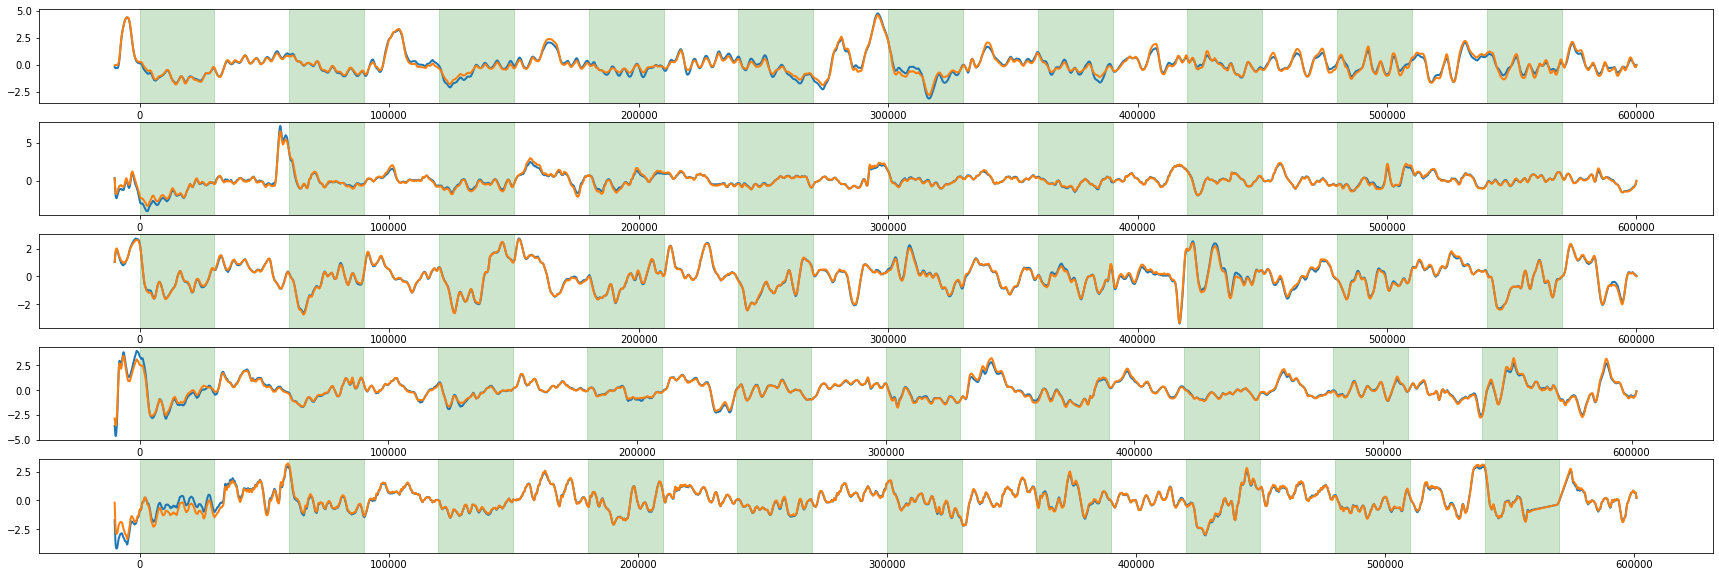

In [ ]:
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(nrecs,1,figsize=(30, nrecs*2))


for i in range(nrecs):
  df = recs[i]
  df = filter_df(df, 0.01, 0.5)

  dC_10, dC_27 = estimate_hb(df, 21)
  
  df['hbo_10'] = dC_10[0]
  df['hbo_27'] = dC_27[0]

  scaler = StandardScaler()
  scaler.fit(df)
  scaled = scaler.fit_transform(df)
  scaled_df = pd.DataFrame(scaled, columns=df.columns)

  ax[i].plot(df.timestamp, scaled_df.hbo_filt, linewidth=2)
  ax[i].plot(df.timestamp, scaled_df.hbo_27, linewidth=2)

  for n in range(nrounds):
    ax[i].axvspan(60000*n, 60000*n+30000, color='green', alpha=0.2)
    # ax[i].axvspan(60000*n, 60000*n+30000, color='green', alpha=0.2)



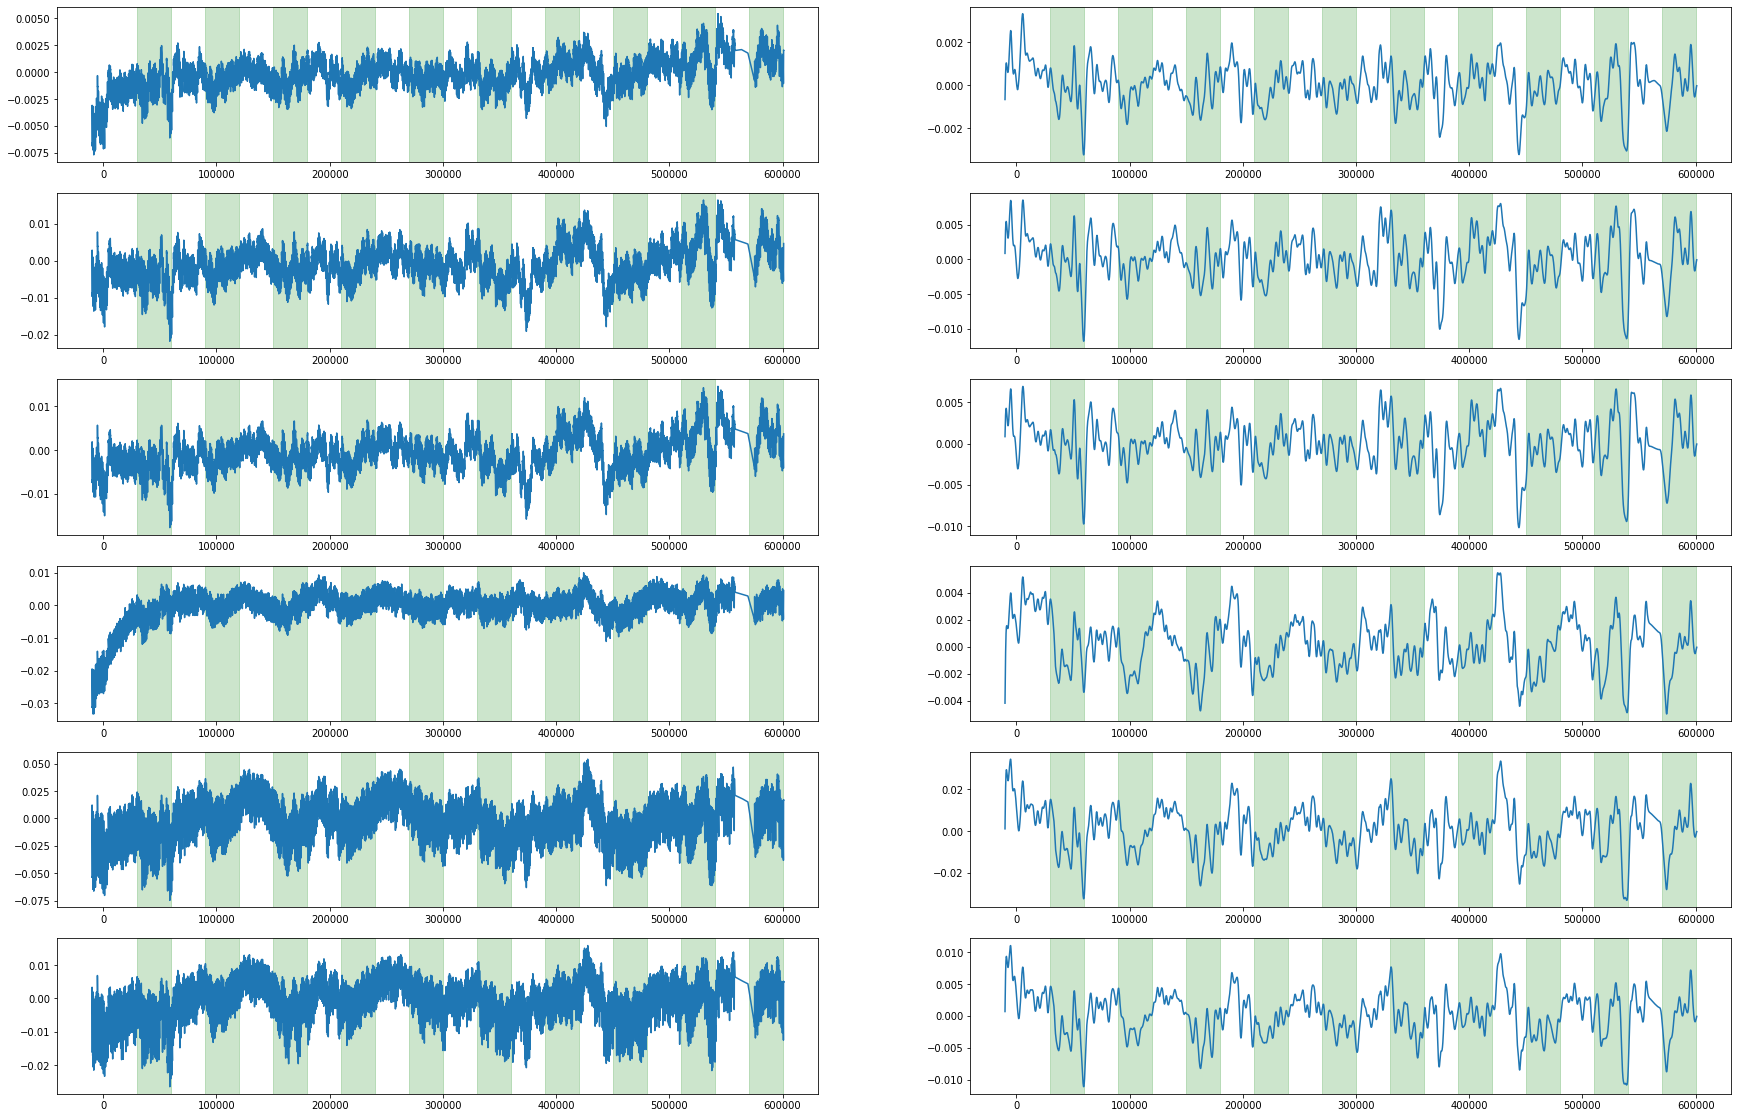

In [ ]:
fig, ax = plt.subplots(6,2,figsize=(30, 20))

ax[0,0].plot(rdf.timestamp, dOD_740_10)
ax[0,1].plot(rdf.timestamp, dOD_740_10_filt)
ax[1,0].plot(rdf.timestamp, dOD_850_10)
ax[1,1].plot(rdf.timestamp, dOD_850_10_filt)
ax[2,0].plot(rdf.timestamp, dOD_940_10)
ax[2,1].plot(rdf.timestamp, dOD_940_10_filt)
ax[3,0].plot(rdf.timestamp, dOD_740_27)
ax[3,1].plot(rdf.timestamp, dOD_740_27_filt)
ax[4,0].plot(rdf.timestamp, dOD_850_27)
ax[4,1].plot(rdf.timestamp, dOD_850_27_filt)
ax[5,0].plot(rdf.timestamp, dOD_940_27)
ax[5,1].plot(rdf.timestamp, dOD_940_27_filt)



for n in range(10):
  for i in range(6):
    for j in range(2):
      ax[i,j].axvspan(60000*n+30000, 60000*n+60000, color='green', alpha=0.2)